# AUEB M.Sc. in Data Science (part-time)

### 2024.04 - 2024.06

## Project 01: Exercises on n-gram language models


**Course**: Text Analytics   
**Authors**:
Anagnos Theodoros (p3352323) -
Michalopoulos Ioannis (p3352314) -
Kafantaris Panagiotis (p3352328) -  
Vigkos Ioannis (p3352326)

**Date**: 2024-04-15

## > Part 3

In [ ]:
!pip install -U nltk

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install fuzzywuzzy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import math
import random
import unicodedata
import string
from collections import Counter
from pprint import pprint
import sys

# nltk
import nltk
from nltk.util import ngrams
from nltk.corpus import gutenberg
from nltk.corpus import webtext
from nltk.corpus import stopwords

from fuzzywuzzy import fuzz
from scipy.special import softmax

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# (i) Bigram and Trigram Language Models

In [ ]:
### Download if not imported
nltk.download('gutenberg')
nltk.download('punkt')

#nltk.download('stopwords')
# nltk.download('brown')
# nltk.download('europarl_raw')
# nltk.download('reuters')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# load the package
gutenberg_corpus = nltk.corpus.gutenberg.fileids()
# print files
gutenberg_corpus

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
# print first sentence
gutenberg.raw(gutenberg_corpus[1]).split('.')[0]

'[Persuasion by Jane Austen 1818]\n\n\nChapter 1\n\n\nSir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,\nfor his own amusement, never took up any book but the Baronetage;\nthere he found occupation for an idle hour, and consolation in a\ndistressed one; there his faculties were roused into admiration and\nrespect, by contemplating the limited remnant of the earliest patents;\nthere any unwelcome sensations, arising from domestic affairs\nchanged naturally into pity and contempt as he turned over\nthe almost endless creations of the last century; and there,\nif every other leaf were powerless, he could read his own history\nwith an interest which never failed'

In [ ]:
#cap to small
final_corpus = ''
for corpus in gutenberg_corpus:
    text = gutenberg.raw(fileids=corpus)
    lower_text = text.lower()
    final_corpus += lower_text

len(final_corpus.split())

2135242

## Cleaning

In [ ]:
#stop_words = set(stopwords.words('english'))

# def text_cleaning(text: str) -> str:
#     """ Keep words and sentence ending characters, remove punctuation and other characters and remove multiple white spaces."""
#     corpus = re.sub(r'[^a-zA-Z.?!\']'',', ' ', text)
#     corpus = corpus.replace('_', ' ')
#     corpus = corpus.replace('-', ' ')
#     corpus = corpus.replace('[', '')
#     corpus = corpus.replace(']', '.')
#     corpus = re.sub(r'[[]/$@^&*()€:;΄]', ' ', corpus)
#     corpus = re.sub(' +', ' ', corpus)
#     corpus = corpus.replace('\n', ' ')
#     corpus = ' '.join(corpus.split())
#     return corpus

def text_cleaning(text: str) -> str:
    text = re.sub(r'[^\w\s.!?]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\s+([.!?])', '', text)
    text = re.sub(r'[[]/$@^&*()€:;΄]', '', text)
    if text != '':
      return text
    else:
      return;


## Tokenisation Sentence level

In [ ]:
def sentence_tokenization(text: str) -> list:
    """ Function that uses ntlk's sent_tokenize function. 'Tokenizers divide strings into lists of substrings.' """
    sentence_list = nltk.sent_tokenize(''.join(text))
    return sentence_list

In [ ]:
sentence_list = sentence_tokenization(final_corpus)

print(sentence_list[2])

her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


## Tokenisation Word level

In [ ]:
def word_tokenization(text: str) -> list:
  """ Function that applies word_tokenize if a given sentence."""
  # text = text_cleaning(text)
  words = nltk.word_tokenize(text)
  sentence = []
  for word in words:
    text = text_cleaning(word)
    if text == '?' or text ==None or text == '.':
      continue
    sentence.append(text)
  return sentence

# Run it for every entry in the sentence_list
corpus_in_list_of_words = [word_tokenization(f) for f in sentence_list]

# Print the first sentence of the corpus
print([i for i in corpus_in_list_of_words[1]])

<ipython-input-9-b1d785a26e90>:20: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]/$@^&*()€:;΄]', '', text)


['she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sister', 's', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period']


## Train-Test split 60-20-20

In [ ]:
# Set random seed for reproducibility
random.seed(1)

# Shuffle and calculate split length
random.shuffle(corpus_in_list_of_words)
train_length = math.floor(0.6 * len(corpus_in_list_of_words))
dev_length   = test_length = math.floor(0.2 * len(corpus_in_list_of_words))

train_corpus = [f for f in corpus_in_list_of_words[0 : train_length]]
dev_corpus   = [f for f in corpus_in_list_of_words[train_length : train_length + dev_length]]
test_corpus  = [f for f in corpus_in_list_of_words[train_length + dev_length:]]

## Create and count n-grams frequency (NLTK), Vocabulary, OOV Words

* In the next part of the code we will create and count n-grams frequencym for unigrams, biagrams and triagrams using nltk.util.
* Moreover, using the unigram count, we will build the Vocabulary, which will consist words that appear at least 10 times in the training subset.
* All the out-of-vocabulary (OOV) words, will be replaced by a special token UNK.



In [ ]:
def calc_unigrams(corpus: list) -> Counter:
    """ Calculates Unigram Counter of a given corpus."""
    unigram_counter = Counter()
    for sentence in corpus:
        unigram_counter.update([gram for gram in ngrams(sentence, 1, pad_left=True, pad_right=True, left_pad_symbol='<start>', right_pad_symbol='<end>')])
    return unigram_counter

def calc_bigrams(corpus: list) -> Counter:
    """ Calculates Biagram Counter of a given corpus."""
    bigram_counter = Counter()
    for sentence in corpus:
        bigram_counter.update([gram for gram in ngrams(sentence, 2, pad_left=True, pad_right=True, left_pad_symbol='<start>', right_pad_symbol='<end>')])
    return bigram_counter

def calc_trigrams(corpus: list) -> Counter:
    """ Calculates Trigram Counter of a given corpus."""
    trigram_counter = Counter()
    for sentence in corpus:
        trigram_counter.update([gram for gram in ngrams(sentence, 3, pad_left=True, pad_right=True, left_pad_symbol='<start>', right_pad_symbol='<end>')])
    return trigram_counter

def replace_oov_words_train(corpus):
    """ Calculates and replaces OOV words.
    INPUT: Train corpus (list)
    OUTPUT:
      OOV_word: dict with key containing OOC words and value the str 'UNK' -> dict
      clean_corpus: the original corpus having the OOV words replaced by 'UNK' -> list
      vocabulary: the words contained in the vocabulary -> set
    """

    unigram_counter = calc_unigrams(corpus)
    OOV_words = {k[0]:"UNK" for k, v in unigram_counter.items() if v < 10}
    clean_corpus = []
    for sentence in corpus:
        clean_corpus.append([OOV_words.get(n,n) for n in sentence])
    vocabulary = [f[0] for f in unigram_counter.keys() if f[0] not in OOV_words]
    vocabulary = set(vocabulary) # set for unique words
    return OOV_words, clean_corpus, vocabulary

In [ ]:
oov_words, clean_corpus, vocabulary = replace_oov_words_train(train_corpus)

In [ ]:
# for item in vocabulary:
#   print(item)
#   break
# v= [key for key, value in oov_words.items() if value == 'UNK']
# print(v)

In [ ]:
# print some random OOV words
random.sample(list(oov_words.keys()), 5)

['defective', 'exorcist', 'antelope', 'sleekest', 'inspiring']

## Vocabulary built, we then replace the OOV words in the remaining test set.

In [ ]:
def replace_oov_words_dev_test(corpus, vocabulary, oov_words):
    clean_corpus = []
    for sentence in corpus:
        updated_sentence = ['UNK' if ((word not in vocabulary) or (word in oov_words)) else word for word in sentence]
        clean_corpus.append(updated_sentence)
    return clean_corpus

In [ ]:
dev_corpus = replace_oov_words_dev_test(dev_corpus, vocabulary, oov_words)
test_corpus = replace_oov_words_dev_test(test_corpus, vocabulary, oov_words)

In [ ]:
test_corpus[10]

['it', 's', 'very', 'very', 'seldom', 'a', 'man', 'is', 'quite', 'alone']

## We calculate the n-grams in the train set and the V (vocabulary) length.

In [ ]:
vocabulary_length = len(vocabulary)
unigram_counter = calc_unigrams(train_corpus)
bigram_counter = calc_bigrams(train_corpus)
trigram_counter = calc_trigrams(train_corpus)

In [ ]:
print(f'Vocabulary Length: {vocabulary_length}')
print('='*25, '\nUnigram 10 most common:')
pprint(unigram_counter.most_common(10))
print('='*25, '\nBigram 10 most common:')
pprint(bigram_counter.most_common(10))
print('='*25, '\nTrigram 10 most common:')
pprint(trigram_counter.most_common(10))

Vocabulary Length: 7831
Unigram 10 most common:
[(('the',), 80478),
 (('and',), 57193),
 (('of',), 42912),
 (('to',), 28570),
 (('in',), 20122),
 (('a',), 19928),
 (('i',), 17822),
 (('that',), 17200),
 (('he',), 15316),
 (('it',), 13198)]
Bigram 10 most common:
[(('of', 'the'), 11610),
 (('in', 'the'), 6109),
 (('and', 'the'), 5419),
 (('!', '<end>'), 4722),
 (('the', 'lord'), 4295),
 (('to', 'the'), 3297),
 (('<start>', 'i'), 2969),
 (('<start>', 'the'), 2397),
 (('all', 'the'), 2133),
 (('and', 'he'), 2127)]
Trigram 10 most common:
[(('!', '<end>', '<end>'), 4722),
 (('<start>', '<start>', 'i'), 2969),
 (('<start>', '<start>', 'the'), 2397),
 (('<start>', '<start>', 'and'), 2103),
 (('<start>', '<start>', 'he'), 1689),
 (('<start>', '<start>', 'but'), 1611),
 (('<start>', '<start>', 'it'), 1255),
 (('of', 'the', 'lord'), 1105),
 (('it', '<end>', '<end>'), 1100),
 (('him', '<end>', '<end>'), 1040)]


# (ii) Cross Entropy and Perplexity of the language for the Bigram and Trigram model

* Using Laplace smoothing and the dev set as a single sequece of sentences, we will calculate the n-gram probabilities, by summing the logs. Logs are used as they are more convinient, compared to the product, since the product of many probabilities might result in underfloat events.
* We add start (or start1, start2) at the beginning of each sentence, and end at the end of each sentence.
* Probabilities of the form P(start…) or P(start1…), P(start2
…) will be excluded in the computation of cross-entropy and perplexity.
* Final tuning of the $\alpha$ parameter of a-smoothing.

In [ ]:
## laplace smoothing


def calc_bi_prob(word1: str, word2: str, alpha: float, bigram_counter: Counter, unigram_counter: Counter, vocabulary_length: int) -> float:
    """ Function that calculates the Bigram model's probabilities using Laplace & a-smoothing."""
    #Bigram prob + laplace smoothing
    bigram_prob = (bigram_counter[(word1, word2)] + alpha) / (unigram_counter[(word1,)] + alpha * vocabulary_length)
    return bigram_prob

def calc_tri_prob(word1: str, word2: str, word3:str, alpha: float, trigram_counter:Counter, bigram_counter:Counter, vocabulary_length: int) -> float:
    """ Function that calculates the Trigram model's probabilities using Laplace & a-smoothing."""
    #Bigram prob + laplace smoothing
    trigram_prob = (trigram_counter[(word1, word2, word3)] +alpha) / (bigram_counter[(word1, word2)] + alpha * vocabulary_length)
    return trigram_prob

## Bigram case

In [ ]:
# initialize variables
perpl = []
HC_list = []
min, pos = 1, 0
min_range_bi = []
alpha_list = np.linspace(0.001,0.1,100)

for i, alpha in enumerate(alpha_list):

    sum_prob = 0
    bigram_cnt = 0
    for sent in dev_corpus:
        sent = ['<start>']  + sent + ['<end>']
        for idx in range(1,len(sent)):
            bigram_prob = calc_bi_prob(word1=sent[idx-1], word2=sent[idx], alpha=alpha, bigram_counter=bigram_counter, unigram_counter=unigram_counter, vocabulary_length=vocabulary_length)
            sum_prob += math.log2(bigram_prob)
            bigram_cnt+=1

    HC_list.append(-sum_prob / bigram_cnt)
    perpl.append(math.pow(2,(-sum_prob / bigram_cnt)))

    if i == 0:
        min_entrp = -sum_prob / bigram_cnt
    elif (-sum_prob / bigram_cnt) <= min_entrp:
        min_range_bi.append(i)

perpl_bi = np.array(perpl)
entropy_bi = np.array(HC_list)
best_alpha_bi = alpha_list[np.argmin(perpl)]

print(f"Min perplexity/entropy regarding bigram model is : {round(np.min(perpl_bi),3)} / {round(np.min(entropy_bi),3)} at alpha= {np.round(best_alpha_bi, 3)}")

Min perplexity/entropy regarding bigram model is : 371.386 / 8.537 at alpha= 0.011


## Trigram case

In [ ]:
# initialize variables
perpl = []
HC_list = []
min_range_tri = []
alpha_list = np.linspace(0.001,0.1,100)

for i, alpha in enumerate(alpha_list):

    sum_prob = 0
    trigram_cnt = 0
    for sent in dev_corpus:
        sent = ['<start>', '<start>'] + sent + ['<end>']
        for idx in range(2,len(sent)):
            trigram_prob = calc_tri_prob(word1=sent[idx-2], word2=sent[idx-1], word3=sent[idx], alpha=alpha, trigram_counter=trigram_counter, bigram_counter=bigram_counter, vocabulary_length=vocabulary_length)
            sum_prob += math.log2(trigram_prob)
            trigram_cnt+=1

    # append Cross-entropy and perplexity
    HC_list.append(-sum_prob / trigram_cnt)
    perpl.append(math.pow(2,(-sum_prob / trigram_cnt)))

    if i == 0:
        min_entrp = -sum_prob / trigram_cnt
    elif (-sum_prob / trigram_cnt) <= min_entrp:
        min_range_tri.append(i)

perpl_tri = np.array(perpl)
entropy_tri = np.array(HC_list)
best_alpha_tri = alpha_list[np.argmin(perpl_tri)]

print(f"The lowest perplexity / entropy regarding trigram model is : {round(np.min(perpl_tri),3)} / {round(np.min(entropy_tri),3)} at alpha= {np.round(best_alpha_tri, 3)}")

The lowest perplexity / entropy regarding trigram model is : 916.987 / 9.841 at alpha= 0.003


## Visualise the results

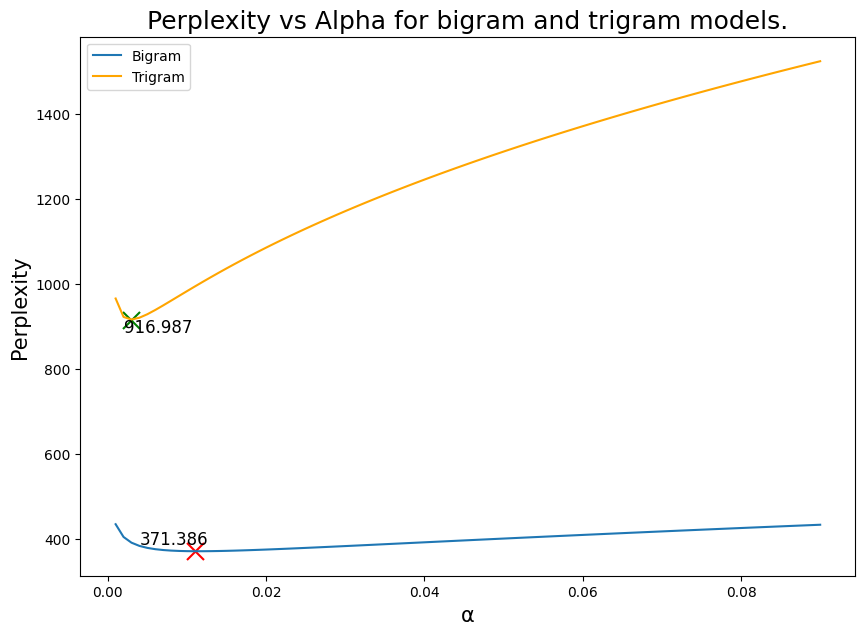

In [ ]:
# Find plot range
plot_range = max(int(min_range_tri[-1]),int(min_range_bi[-1]))

# define plot parameters for bigrama dn trigram
pos_bi = np.argmin(perpl_bi)
alpha_range_zoom_bi, perpl_zoom_bi = alpha_list[:plot_range], perpl_bi[:plot_range]
pos_tri = np.argmin(perpl_tri)
alpha_range_zoom_tri, perpl_zoom_tri = alpha_list[:plot_range], perpl_tri[:plot_range]


# Plot the results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

# Bigram plot
ax.plot(alpha_range_zoom_bi, perpl_zoom_bi, label='Bigram', color='#1f77b4')
ax.scatter(alpha_range_zoom_bi[pos_bi], perpl_zoom_bi[pos_bi], c='r', marker='x', s=150)
ax.annotate(f"{perpl_zoom_bi[pos_bi]:.3f}", xy=(alpha_range_zoom_bi[pos_bi]-0.007, perpl_zoom_bi[pos_bi]+15), fontsize=12)
ax.set_xlabel('α', fontsize=15)
ax.set_ylabel('Perplexity', fontsize=15)


# Trigram plot and twin axes
# ax2 = ax.twinx()
ax.plot(alpha_range_zoom_tri, perpl_zoom_tri, label='Trigram', color='orange')
ax.scatter(alpha_range_zoom_tri[pos_tri], perpl_zoom_tri[pos_tri], c='g', marker='x', s=150)
ax.annotate(f"{perpl_zoom_tri[pos_tri]:.3f}", xy=(alpha_range_zoom_tri[pos_tri]-0.0009, perpl_zoom_tri[pos_tri]-30), fontsize=12)

# set title and legend
ax.set_title('Perplexity vs Alpha for bigram and trigram models.', fontsize=18)
_ = ax.legend(loc='upper left')

In order to take the best out of laplace smoothing brigram and trigram probabilities. We take the best **alpa** we have already computed

In [ ]:
bigram_probabilities = {}
for bigram, count in bigram_counter.items():
  w1, w2 = bigram

  bigram_prob = calc_bi_prob(w1, w2, alpha=best_alpha_bi, bigram_counter=bigram_counter, unigram_counter=unigram_counter, vocabulary_length=vocabulary_length)

  bigram_probabilities[bigram] = bigram_prob

trigram_probabilities = {}
for trigram, count in trigram_counter.items():
  w1, w2, w3 = trigram

  trigram_prob = calc_tri_prob(w1, w2, w3, alpha = best_alpha_tri, trigram_counter = trigram_counter, bigram_counter = bigram_counter, vocabulary_length = vocabulary_length)

  trigram_probabilities[trigram] = trigram_prob

In [ ]:
for bigram, prob in bigram_probabilities.items():
    print("Trigram:", bigram, "Probability:", prob)
    break
for trigram, prob in trigram_probabilities.items():
    print("Trigram:", trigram, "Probability:", prob)
    break

Trigram: ('<start>', 'this') Probability: 5.1544676750908405
Trigram: ('<start>', '<start>', 'this') Probability: 18.89937428170093


In [ ]:
sum_prob = 0
log_prob_bigram_correct=[]
for sent in test_corpus:
    sent = ['<start>']  + sent + ['<end>']
    for idx in range(1,len(sent)):
        bigram_prob = calc_bi_prob(word1=sent[idx-1], word2=sent[idx], alpha=best_alpha_bi, bigram_counter=bigram_counter, unigram_counter=unigram_counter, vocabulary_length=vocabulary_length)
        sum_prob += math.log2(bigram_prob)
        bigram_cnt+=1
    log_prob_bigram_correct.append(sum_prob)
    sum_prob = 0

df_bigram = pd.DataFrame({"Correct Sentence":test_corpus, "Log Probability Correct":log_prob_bigram_correct})
df_bigram.head()

,Correct Sentence,Log Probability Correct
0,"[have, not, i, some, right, to, complain]",-57.901658
1,"[132, i, told, you, before, and, UNK, you, as,...",-534.287267
2,"[UNK, therefore, thus, saith, the, lord, behol...",-531.491464
3,"[nor, in, UNK, does, this, wondrous, brow, UNK...",-229.030890
4,"[ha, ha, !]",-7.761963


In [ ]:
sum_prob = 0
log_prob_trigram_correct=[]
for sent in test_corpus:
    # This was wrong in trigram we need 2 starts not 1
    sent = ['<start>', '<start>']  + sent + ['<end>', '<end>']
    for idx in range(2,len(sent)):
        trigram_prob = calc_tri_prob(word1=sent[idx-2], word2=sent[idx-1], word3=sent[idx], alpha=best_alpha_tri, trigram_counter=trigram_counter, bigram_counter=bigram_counter, vocabulary_length=vocabulary_length)
        sum_prob += math.log2(trigram_prob)
    log_prob_trigram_correct.append(sum_prob)
    sum_prob = 0

df_trigram = pd.DataFrame({"Correct Sentence":test_corpus, "Log Probability Correct":log_prob_trigram_correct})
df_trigram.head()

,Correct Sentence,Log Probability Correct
0,"[have, not, i, some, right, to, complain]",-63.304380
1,"[132, i, told, you, before, and, UNK, you, as,...",-682.033661
2,"[UNK, therefore, thus, saith, the, lord, behol...",-519.493529
3,"[nor, in, UNK, does, this, wondrous, brow, UNK...",-246.677893
4,"[ha, ha, !]",-8.097061


## Bigram model

In [ ]:
test_sequence = []
for sent in test_corpus:
    test_sequence += ['<start>']  + sent + ['<end>']

sum_prob = 0
bigram_cnt = 0
for idx in range(1,len(test_sequence)):
    if test_sequence[idx] != '<start>':
        bigram_prob = calc_bi_prob(word1=test_sequence[idx-1], word2=test_sequence[idx], alpha=best_alpha_bi, bigram_counter=bigram_counter, unigram_counter=unigram_counter, vocabulary_length=vocabulary_length)
        sum_prob += math.log2(bigram_prob)
        bigram_cnt+=1

HC = -sum_prob / bigram_cnt
perpl = math.pow(2,HC)
#print(sum_prob)
#print(bigram_cnt)
print("Language Cross Entropy: {0:.3f}".format(HC))
print("Language Perplexity: {0:.3f}".format(perpl))

Language Cross Entropy: 8.506
Language Perplexity: 363.611


## Trigram model

In [ ]:
test_sequence = []
for sent in test_corpus:
    test_sequence += ['<start>', '<start>']  + sent + ['<end>', '<end>']

sum_prob = 0
trigram_cnt = 0
for idx in range(2,len(test_sequence)):
    if test_sequence[idx] != '<start>':
        trigram_prob = calc_tri_prob(word1=test_sequence[idx-2], word2=test_sequence[idx-1], word3=test_sequence[idx], alpha=best_alpha_tri, trigram_counter=trigram_counter, bigram_counter=bigram_counter, vocabulary_length=vocabulary_length)
        sum_prob += math.log2(trigram_prob)
        trigram_cnt+=1

HC = -sum_prob / trigram_cnt
perpl = math.pow(2,HC)
#print(sum_prob)
#print(trigram_cnt)
print("Language Cross Entropy: {0:.3f}".format(HC))
print("Language Perplexity: {0:.3f}".format(perpl))

Language Cross Entropy: 9.519
Language Perplexity: 733.755


# (iii) Language models testing

# Write some code to show how your bigram and trigram language models can autocomplete an incomplete sentence.

* **Create Autocomplete Functions:** Make two functions—one for bigram-based and one for trigram-based language models—that can finish sentences based on what comes before.
* **Compare Probabilities:** Look at the probabilities each model assigns to different words for a given incomplete sentence. This will help us understand how well each model predicts the next word.
* **Finish the Word:** Use the trained language models to suggest what word might come next in an unfinished sentence. This way, we can see how each model predicts the rest of the sentence.
* **Show Results:** Display the original sentence alongside the suggestions made by both the bigram and trigram models. This will help us see which model gives more accurate suggestions and how they differ.

In [ ]:
def bigram_autocomplete(prefix):

    sentence = prefix

    prefix_tokens = prefix.split()
    cnt=0 # 10 max iterations
    most_probable_word = None
    while (most_probable_word not in ['.','<end>'] and cnt<1): #cnt=1 to pedict the next word and, it stops when it finds '.','<end>'

        w = prefix_tokens[-1]

        most_probable_word = None
        max_probability = 0

        for bigram, prob in list(bigram_probabilities.items()):
            if bigram[0].lower() == w.lower():
                next_word = bigram[1]
                if prob > max_probability:
                    most_probable_word = next_word
                    max_probability = prob


        if most_probable_word:

            sentence += " " + most_probable_word
            if most_probable_word in ['.','<end>']:
                break
            prefix_tokens.append(most_probable_word)
        else:
            break  # If no probable word found, break the loop
        cnt+=1
    return sentence

In [ ]:
def trigram_autocomplete(prefix):
    sentence = prefix


    prefix_tokens = prefix.split()


    cnt=0 # 10 max iterations
    most_probable_word = None
    while (most_probable_word not in ['.','<end>'] and cnt<1): #cnt=1 to pedict the next word and, it stops when it finds '.','<end>'

        w1, w2 = prefix_tokens[-2:]


        most_probable_word = None
        max_probability = 0


        for trigram, prob in list(trigram_probabilities.items()):

            if trigram[:2] == (w1.lower(), w2.lower()):

                next_word = trigram[2]

                if prob > max_probability:
                  most_probable_word = next_word
                  max_probability = prob


        if most_probable_word:

            sentence += " " + most_probable_word

            if most_probable_word in ['.','<end>']:
                break

            prefix_tokens.append(most_probable_word)
        else:
            break
        cnt+=1

    return sentence

In [ ]:
prefix = "make sure"
print('Bigram: ',bigram_autocomplete(prefix))
print('Trigram: ',trigram_autocomplete(prefix))

Bigram:  make sure i
Trigram:  make sure that


In [ ]:
prefix = "believe it or"
print('Bigram: ',bigram_autocomplete(prefix))
print('Trigram: ',trigram_autocomplete(prefix))

Bigram:  believe it or the
Trigram:  believe it or not


In [ ]:
prefix = "i would like"
print('Bigram: ',bigram_autocomplete(prefix))
print('Trigram: ',trigram_autocomplete(prefix))

Bigram:  i would like a
Trigram:  i would like to


In [ ]:
prefix = "Try not to"
print('Bigram: ',bigram_autocomplete(prefix))
print('Trigram: ',trigram_autocomplete(prefix))

Bigram:  Try not to the
Trigram:  Try not to be


# iv) Develop a context-aware spelling corrector

**Process:**

We utilize both bigram and trigram language models along with a beam search decoder to correct misspelled words in a sentence. The spelling correction probability 𝑃(𝑤𝑖 ∣ 𝑡𝑖) is modeled inversely by the Levenshtein distance between the misspelled word 𝑤𝑖 and the candidate correction 𝑡𝑖.

**Key Components:**

***Levenshtein Distance Function:***
This function computes the *Levenshtein distance* between two words, which quantifies the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one word into the other. The probability of correction is inversely proportional to this distance.

**Beam Search Correction Algorithm:**

Initialization: Start with a beam containing the start token.

* **Expansion:** For each token in the input, generate candidate corrections from the vocabulary that have a non-trivial Levenshtein probability with the current token.
* **Scoring:** Calculate the combined score for each candidate using both the language model probability (from bigrams or trigrams) and the spelling correction probability.
* **Selection:** Retain the top scoring candidates as per the beam size constraint.
* **Parameter Tuning:**
The importance of the language model score logP(t1​) versus the spelling correction score log⁡𝑃(𝑤1∣𝑡1) can be adjusted using the hyperparameters 𝜆1 and 𝜆2. We think that log⁡𝑃(𝑤1∣𝑡1) is more important because the algorithm must understand a sentence and not an individual word. As a result we set   λ2=0.8 and λ1=0.2
* **Execution:**
The provided Python function beam_search_correction accepts an input sentence, tokenizes it, and processes it through the beam search algorithm using either bigram or trigram models. The final output is a corrected version of the input sentence.

In [ ]:
!pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.6 MB/s eta 0:00:00


In [ ]:
from Levenshtein import distance as levenshtein_distance

def levenshtein_prob(w1, t1):
    ld = levenshtein_distance(w1, t1)
    return 1 / (ld + 1)

In [ ]:
def beam_search_correction(input_tokens, beam_size=3, use_trigrams=False, lambda1=0.2, lambda2=0.8):
    beams = [(0, ['<start>'])]
    for token in input_tokens:
        new_beams = []
        for score, path in beams:

            candidates = [v for v in vocabulary if levenshtein_prob(token, v) > 0.23]

            for candidate in candidates:
                if use_trigrams and len(path) >= 2:
                    context = (path[-2], path[-1], candidate)
                    if context in trigram_probabilities:
                        prob_t1 = trigram_probabilities[context]
                    else:
                        prob_t1 = 0.000001
                else:
                    context = (path[-1], candidate)
                    if context in bigram_probabilities:
                        prob_t1 = bigram_probabilities[context]
                    else:
                        prob_t1 = 0.000001


                prob_w1_t1 = levenshtein_prob(token, candidate)

                candidate_score = score + lambda1 * np.log(prob_t1) + lambda2 * np.log(prob_w1_t1)
                new_beams.append((candidate_score, path + [candidate]))


        beams = sorted(new_beams, key=lambda x: x[0], reverse=True)[:beam_size]

    return max(beams, key=lambda x: x[0])[1][1:]


In [ ]:
input_sentence = "have not i some rigUv to Iokplain"
input = nltk.word_tokenize(input_sentence.lower())
print("Input Sentence:", " ".join(input))
corrected_sentence = beam_search_correction(input, beam_size=5, use_trigrams=False)
print("Corrected Sentence with Bigrams:", " ".join(corrected_sentence))
corrected_sentence = beam_search_correction(input, beam_size=5, use_trigrams=True)
print("Corrected Sentence with Trigrams:", " ".join(corrected_sentence))

Input Sentence: have not i some riguv to iokplain
Corrected Sentence with Bigrams: have not i come nigh to complain
Corrected Sentence with Trigrams: have not i am right is complain


**Analysis:**

**Corrected Sentence with Bigrams:**
* The phrase "come nigh to" suggests that the bigram model struggled with contextual appropriateness. The model likely inferred these words based on local adjacency probabilities from its training on bigrams without a broader understanding of context, leading to semantically incorrect suggestions.

* The model successfully corrected "iokplain" to "complain", demonstrating effective spelling correction for that word based on likely bigram sequences.

**Corrected Sentence with Trigrams:**
* The introduction of the words "am" and "is" indicates a limitation in the trigram model’s ability to maintain grammatical structure in the presence of initial spelling errors. This suggests that the trigram context was not sufficient to override the erroneous outputs or that the error severely affected the trigram probabilities.

* The word "right" as a correction for "riguv" could reflect a plausible phonetic or partial spelling match in the model, showing a successful correction attempt. However, it’s contextually inappropriate in this sentence.
General Observations:



# V) Artificial test dataset
* Creates a function that takes a sentence and changes some letters.

In [ ]:
import random
import re

def replace_letters(sentence):
    #words = sentence.split()
    words = nltk.word_tokenize(sentence)
    new_sentence = []

    for word in words:
        if len(word) > 4:
            indices = random.sample(range(len(word)), 2)
            new_word = list(word)
            for index in indices:
                new_word[index] = random.choice([chr(i) for i in range(65, 91)] + [chr(i) for i in range(97, 123)])
            new_sentence.append(''.join(new_word))
        else:
            new_sentence.append(word)

    return ' '.join(new_sentence)

In [ ]:
true_test_set = []
fake_test_set = []

for i in range(30):
    true_test_set.append(' '.join(test_corpus[i][:]))
    fake_test_set.append(replace_letters(true_test_set[i]))

In [ ]:
print(true_test_set[10])
print(fake_test_set[10])

it s very very seldom a man is quite alone
it s very very seldKV a man is qUiIe almnK


In [ ]:
test_data_evaluation_bigram = []
test_data_evaluation_trigram = []

In [ ]:
length = len(true_test_set)

for i in range(4):

  print('True sentence: ', true_test_set[i])
  original = nltk.word_tokenize(true_test_set[i].lower())
  print('Fake sentence: ', fake_test_set[i])
  fake = nltk.word_tokenize(fake_test_set[i].lower())
  print('----------Use Bigrams----------')
  corrected_sentence = beam_search_correction(fake, beam_size=5, use_trigrams=False)
  test_data_evaluation_bigram.append((original, corrected_sentence))
  print('Corrected Sentence with bigrams: ', " ".join(corrected_sentence))
  print('----------Use Trigrams----------')
  corrected_sentence = beam_search_correction(fake, beam_size=5, use_trigrams=True)
  test_data_evaluation_trigram.append((original, corrected_sentence))
  print('Corrected Sentence with trigrams: ', " ".join(corrected_sentence))
  print('-------END OF ITERATION--------')

True sentence:  have not i some right to complain
Fake sentence:  have not i some rigmQ to bomplaiE
----------Use Bigrams----------
Corrected Sentence with bigrams:  have not in some time to complain
----------Use Trigrams----------
Corrected Sentence with trigrams:  have not i see him so complain
-------END OF ITERATION--------
True sentence:  132 i told you before and UNK you as if i were present the second time and being absent now i write to them which UNK have sinned and to all other that if i come again i will not spare 133 since ye seek a proof of christ speaking in me which to UNK is not weak but is mighty in you
Fake sentence:  132 i told you bbforv and UNK you as if i were pTwsent the srcoVd time and bEeng abaeBt now i wUjte to them QhiSh UNK have sinrxd and to all ogaer that if i come EgaNn i will not spaGc 133 sikae ye seek a pXXof of nhIist speawiag in me wheGh to UNK is not weak but is NigKty in you
----------Use Bigrams----------
Corrected Sentence with bigrams:  and i t

## (vi)  Evaluate your context-aware spelling corrector

**Initialization**

* **Input:** corrector_function — a callable that takes a sentence as input and returns the corrected version.
* **Process:** During initialization, the class loads the WER and CER metrics using load_metric('wer') and load_metric('cer') from the Hugging Face datasets library.
* **Stored Metrics:** The loaded metrics are stored as instance variables, which will be utilized in the evaluation method.

**Evaluation Method**

* **Input:** test_data — a list of tuples, where each tuple contains an original list of tokens (correctly spelled sentence) and a noised list of tokens (sentence with spelling errors).
* **Process:**
  1. Prediction and Reference Preparation: Iterates over each tuple in test_data. For each tuple, it:
    * Joins the tokens of the noised sentence and passes this string to the corrector_function to obtain the corrected sentence.
    * Joins the tokens of the original sentence to use as the reference.
    * Appends the corrected and original sentences to predictions and references lists, respectively, if the original is not empty.
  2. Metric Calculation: Uses the stored metric functions to compute WER and CER, comparing each corrected sentence to its corresponding original sentence.
* **Output:** Returns the calculated WER and CER scores, representing the average error rates across all test sentences.

In [ ]:
!pip install jiwer

In [ ]:
from datasets import load_metric

In [ ]:
class SpellingCorrectorEvaluator:
    def __init__(self, corrector_function):
        """
        Initializes the evaluator with a spelling corrector function.

        Args:
            corrector_function (callable): A function that takes a sentence as input and returns the corrected sentence.
        """
        self.corrector_function = corrector_function
        # Load WER and CER metrics from the Hugging Face datasets library
        self.wer_metric = load_metric('wer')
        self.cer_metric = load_metric('cer')

    def evaluate(self, test_data):
        """
        Evaluates the spelling corrector on test data.

        Args:
            test_data (list of tuples): A list where each tuple contains the original and noised version of a sentence.

        Returns:
            tuple: A tuple containing the average WER and average CER.
        """
        references = []
        predictions = []

        # Generate predictions and store original and predicted sentences
        for original, noised in test_data:
            corrected = self.corrector_function(' '.join(noised))
            if ' '.join(original) != '':  # Ensure non-empty original sentences
                references.append(' '.join(original))
                predictions.append(corrected)

        # Compute WER and CER using the loaded metrics
        wer_score = self.wer_metric.compute(predictions=predictions, references=references)
        cer_score = self.cer_metric.compute(predictions=predictions, references=references)

        return wer_score, cer_score

# E.g. this shoudl come from iv, v
def example_spelling_corrector(sentence):
    # Assume this function corrects the sentence
    # Placeholder: returns the input as output
    return sentence

# Test_data is available in the format [(original_tokens, noised_tokens), ...]
# test_data = [
#     (["This", "is", "an", "example", "sentence"], ["Tihs", "is", "an", "exmaple", "sntence"]),
#     (["The", "quick", "brown", "fox"], ["The", "quick", "brwn", "fx"]),
# ]

# # Create an evaluator instance
# evaluator = SpellingCorrectorEvaluator(example_spelling_corrector)

# # Perform evaluation
# average_wer, average_cer = evaluator.evaluate(test_data)

# print(f"Average Word Error Rate (WER): {average_wer:.2%}")
# print(f"Average Character Error Rate (CER): {average_cer:.2%}")

In [ ]:
evaluator = SpellingCorrectorEvaluator(example_spelling_corrector)

# Perform evaluation
average_wer, average_cer = evaluator.evaluate(test_data_evaluation_bigram)

print(f"Average Word Error Rate (WER) with Bigrams: {average_wer:.2%}")
print(f"Average Character Error Rate (CER) with Bigrams: {average_cer:.2%}")

<ipython-input-50-18ac4f3278f6>:11: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  self.wer_metric = load_metric('wer')
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for wer contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/wer/wer.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for cer contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/cer/cer.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Average Word Error Rate (WER) with Bigrams: 24.55%
Average Character Error Rate (CER) with Bigrams: 14.02%


In [ ]:
evaluator = SpellingCorrectorEvaluator(example_spelling_corrector)

# Perform evaluation
average_wer, average_cer = evaluator.evaluate(test_data_evaluation_trigram)

print(f"Average Word Error Rate (WER) with Trigrams: {average_wer:.2%}")
print(f"Average Character Error Rate (CER) with Trigrams: {average_cer:.2%}")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for wer contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/wer/wer.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for cer contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/cer/cer.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of

Average Word Error Rate (WER) with Trigrams: 39.52%
Average Character Error Rate (CER) with Trigrams: 20.91%
